## Final Project - Audio Visualization

### By Rinki and Zohaib 

#### Project Introduction
* Converting values of an audio's spectrogram into decibels
* Creating a visualization of these decibel values for the duration of the audio's time

### TODO
  
  - get familiar with audio visualization apis and libraries
    - https://github.com/willianjusten/awesome-audio-visualization

### Reading in Audio

In [1]:
import numpy as np
import math
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

sr = 16000
N = 1024 # frame size (or DFT size or FFT size); N is usually a power of 2 (e.g., 2^10 = 1024).
hop = int(N/2) # hop size (usually half of the frame size)

## Read audio
x, sr = librosa.load('audio1.wav', sr = sr) # read the audio using 8kHz sample rate

print("sample rate =", sr, "(Hz)")
print("number of samples =", len(x))
ipd.display(ipd.Audio(x, rate=sr))



sample rate = 16000 (Hz)
number of samples = 447124


### Applying STFT Function

In [2]:
## STFT shape
frames = math.floor( (len(x)-N) / hop ) + 1 # the total number of frames
STFT = np.zeros((int(N/2)+1, frames), dtype='complex') # the STFT result will be a "int(N/2)+1 by frames" matrix
print("STFT shape:", STFT.shape)

hann = 0.5 * ( 1 - np.cos(2*np.pi*np.arange(N)/N) ) # our Hann window

## Fill in values
for frame in range(frames): # for each frame index
    chunk = x[frame*hop : frame*hop + N] * hann # get the samples in this frame multiplied by the hanning window
    X = np.fft.fft(chunk) # contains N complex numbers
    STFT[:, frame] = X[:int(N/2)+1] # we only need about half of them because of symmetry of DFT
    
print("time in seconds: ", len(x)/sr)

print("")

print(STFT)

STFT shape: (513, 872)
time in seconds:  27.94525

[[ 9.72803396e-02+0.00000000e+00j  6.54722497e+00+0.00000000e+00j
  -5.88638989e+00+0.00000000e+00j ...  1.51363805e-04+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 7.85574857e-02+5.74444631e-02j -6.83087865e+00+1.49149433e+00j
   5.91187845e+00+5.31920288e+00j ...  1.28592873e-04-7.70027149e-05j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 2.95496367e-02+9.28829109e-02j  3.06609550e+00-3.70541799e+00j
  -3.70159380e+00-9.24552358e+00j ...  6.84091696e-05-1.28457607e-04j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 1.66305658e-06+4.38165481e-07j  1.01730297e-05+1.25657202e-05j
  -2.54654732e-05+1.18183467e-05j ... -6.21199043e-11-1.29599093e-10j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 1.45044972e-06+2.45793624e-07j -8.64523946e-06-7.79273709e-06j
  -8.36856788e-08-1.42096468e-05j ... -1.11688253e-10-7.27924883e-

### Spectrogram
#### Decibels are ratios evaluated on a logarithmic scale. 

#### In our audio visualization, we mapped **INSERT NUMBER OF COLORS** colors to decibel values ***GIVE CUTOFF INFORMATION*** using the amplitude values from [0,1]. Compare and contrast the following spectrogram, with frequencies in Hz and decibels, to the audio visualization.

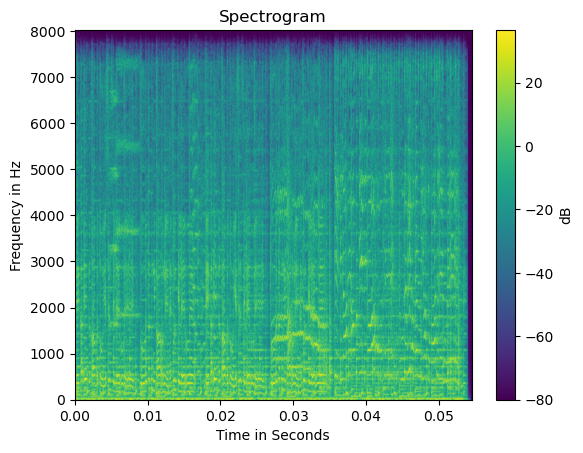

In [28]:
## Plot the spectrogram
spect = np.abs(STFT) # complex numbers --> abs values
plt.imshow(20*np.log10(spect+0.0001), origin='lower', aspect='auto', extent= [0, len(x)/sr, 0, (N//2 +1)*sr/N])
plt.title('Spectrogram')
plt.xlabel('Time in Seconds')
plt.ylabel('Frequency in Hz')
plt.colorbar(label = "dB")
plt.show()

### Decibels

In [4]:
db = 20*np.log10(spect+0.0001) # Matrix of decibel values
print(db)

[[-20.23057431  16.32127795  15.39712804 ... -71.99394515 -80.
  -80.        ]
 [-20.22705467  16.89192116  18.01031805 ... -72.04519255 -80.
  -80.        ]
 [-20.21366693  13.64213672  19.96439407 ... -72.19764252 -80.
  -80.        ]
 ...
 [-79.8518892  -78.6983076  -77.85076341 ... -79.99998752 -80.
  -80.        ]
 [-79.8731502  -79.04367926 -78.84592549 ... -79.99998842 -80.
  -80.        ]
 [-79.88096839 -79.1250148  -79.38524024 ... -79.99998863 -80.
  -80.        ]]


# consider the decibels as widths of shape, frequency as height of shape, and time as axis or not shown

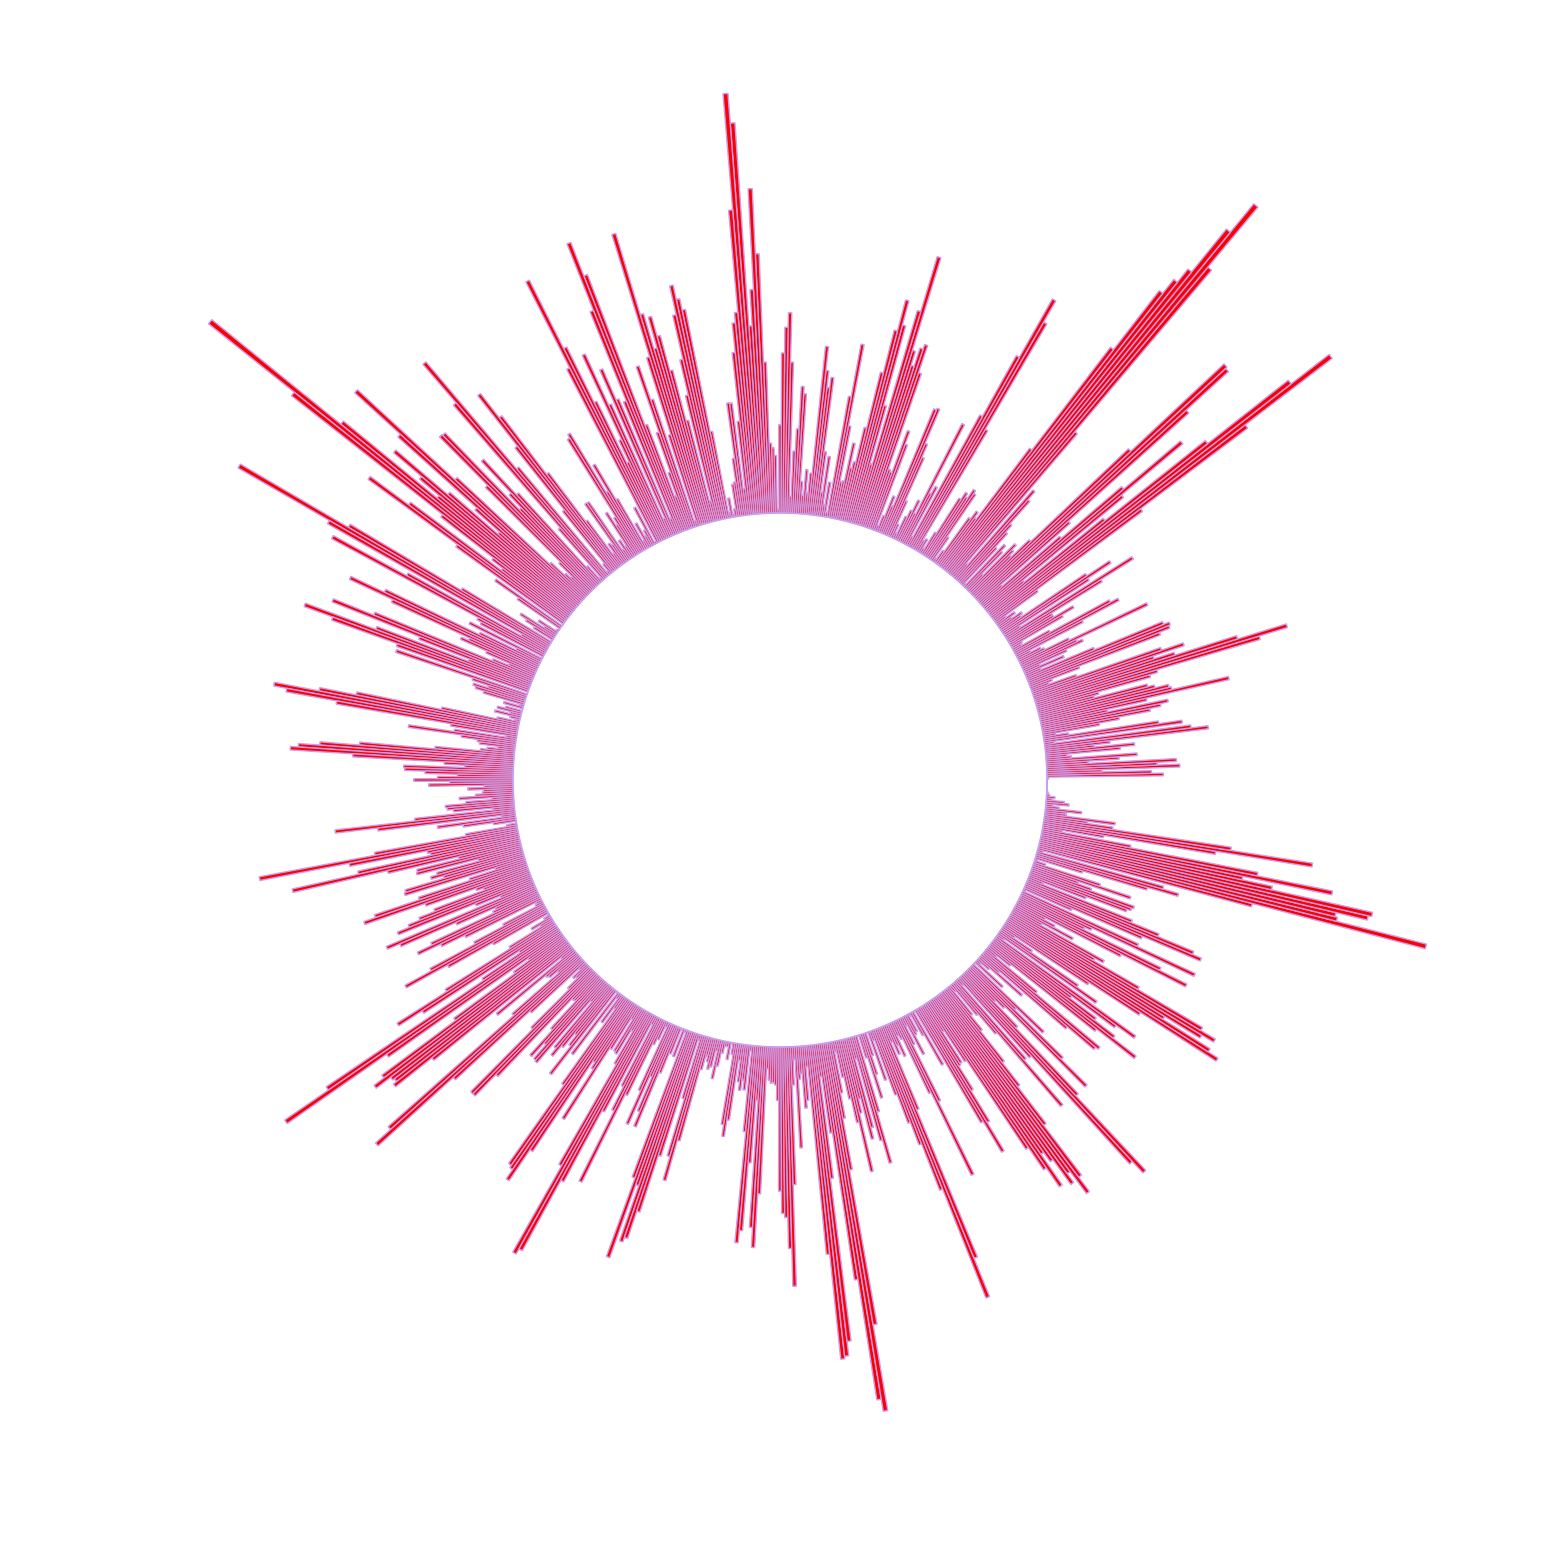

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

for col in range (1): #frames
    for row in range(1): #int(N/2)+1
# Build a dataset
        df = pd.DataFrame(
                {
                    'Value': spect[row,:]
                    
                })

        # set figure size
        plt.figure(figsize=(20,20))

        # plot polar axis
        ax = plt.subplot(111, polar=True)

        # remove grid
        plt.axis('off')

        # Set the coordinates limits
        #upperLimit = 100
        #lowerLimit = 30

        # Compute max and min in the dataset
        max = df['Value'].max()

        # Let's compute heights: they are a conversion of each item value in those new coordinates
        # In our example, 0 in the dataset will be converted to the lowerLimit 
        # The maximum will be converted to the upperLimit 
        #slope = (max - lowerLimit) / max # used for mapping values
        #heights = slope * df.Value + lowerLimit # used for mapping values
        heights = df.Value

        # Compute the width of each bar. In total we have 2*Pi = 360°
        width = 2*np.pi / len(df.index)

        # Compute the angle each bar is centered on:
        indexes = list(range(1, len(df.index)+1))
        angles = [element * width for element in indexes]
        angles

        lowerLimit = 15 # changes inner circle radius
        # Draw bars
        bars = ax.bar(
            x=angles, 
            height=heights, 
            width=width, 
            bottom=lowerLimit,
            linewidth=1,
            color = "r", # red
            edgecolor="#C79FEF") # lavender